In [ ]:
!pip install --upgrade pip
!pip install "tensorflow[and-cuda]"


In [5]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import string

def remove_numbers(s):
    return s.translate(str.maketrans('', '', string.digits))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from PIL import Image

# Sao 31 imagens diferentes onde cada uma representa um canal de cor
def load_multispectral_imagem(image_dir):
    file_names = sorted(os.listdir(image_dir))
    qtd_graos = int(len(file_names)/31)
    print(f'Quantidade de graos: {qtd_graos}')

    multispectral_imgs = []

    for i in range(qtd_graos):
        images = [np.array(Image.open(os.path.join(image_dir, file))) for file in file_names[i*31:(i+1)*31]]
        multispectral_img = np.stack(images, axis=-1)   
        multispectral_imgs.append(multispectral_img)    

    return multispectral_imgs

In [8]:
def process_path(image_dir, label):
    images = load_multispectral_imagem(image_dir)
    labels = [label]*len(images)
    return tf.data.Dataset.from_tensor_slices((images, labels))

In [9]:
folder_to_label = {}

folders = sorted(os.listdir('_recortado'))

i = 0
for folder in folders:
    keys = list(map(lambda x: remove_numbers(x), folder_to_label.keys()))
    if not remove_numbers(folder) in keys:
        i += 1
        folder_to_label[folder] = i
    else:
        folder_to_label[folder] = i

print(folder_to_label)
    
 

{'ardidos1': 1, 'ardidos2': 1, 'ardidos3': 1, 'ardidos4': 1, 'ardidos5': 1, 'bandinhas1': 2, 'bandinhas2': 2, 'bandinhas3': 2, 'bandinhas4': 2, 'bandinhas5': 2, 'chochos1': 3, 'chochos2': 3, 'chochos3': 3, 'chochos4': 3, 'chochos5': 3, 'fermentados1': 4, 'fermentados2': 4, 'fermentados3': 4, 'fermentados4': 4, 'fermentados5': 4, 'imaturos1': 5, 'imaturos2': 5, 'imaturos3': 5, 'imaturos4': 5, 'imaturos5': 5, 'mofados1': 6, 'mofados2': 6, 'mofados3': 6, 'mofados4': 6, 'mofados5': 6, 'purpuras1': 7, 'purpuras2': 7, 'purpuras3': 7, 'purpuras4': 7, 'purpuras5': 7, 'queimados1': 8, 'queimados2': 8, 'queimados3': 8, 'queimados4': 8, 'queimados5': 8, 'soja1': 9, 'soja2': 9, 'soja3': 9, 'soja4': 9, 'soja5': 9, 'soja_b1': 10, 'soja_b2': 10, 'soja_b3': 10, 'soja_b4': 10, 'soja_b5': 10}


In [ ]:
# Enumerate retona um objeto iterável que gera uma tupla contendo um contador e os valores obtidos a partir de um iterável

def create_dataset(base_dir, folder_to_label):
    all_datasets = []

    for folder_name, label in folder_to_label.items():
        class_dir = os.path.join(base_dir, folder_name)
        dataset = process_path(class_dir, label)
        all_datasets.append(dataset)
    
    dataset = all_datasets[0]
    for ds in all_datasets[1:]:
        dataset = dataset.concatenate(ds)

    return dataset
    
dataset = create_dataset('_recortado', folder_to_label=folder_to_label)

In [ ]:
 !pip install pandas

In [18]:
print(dataset)
count_labels = {}

for _, labels in dataset:
    labels_np = str(labels.numpy())
    if labels_np in count_labels:
        count_labels[labels_np] += 1
    else:
        count_labels[labels_np] = 1

print(f'Quantidade de amostras por categoria: {count_labels}')

<_ConcatenateDataset element_spec=(TensorSpec(shape=(64, 64, 31), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
Quantidade de amostras por categoria: {'1': 425, '2': 651, '3': 464, '4': 464, '5': 298, '6': 259, '7': 310, '8': 477, '9': 773, '10': 879}


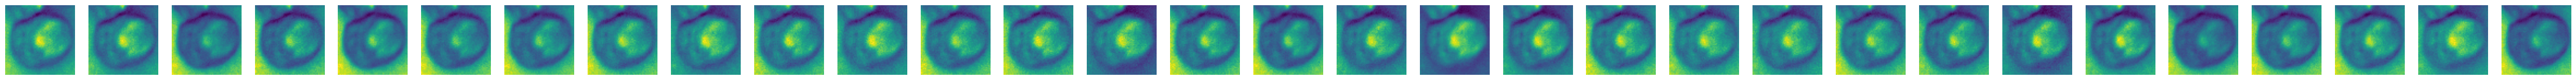

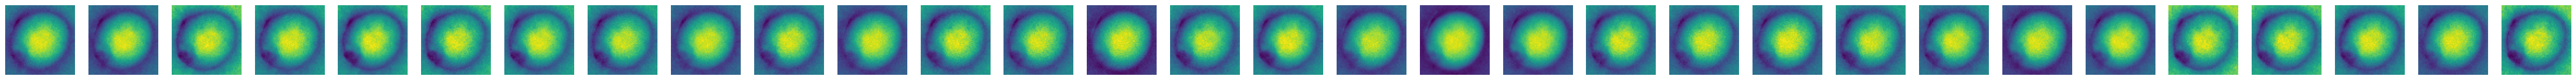

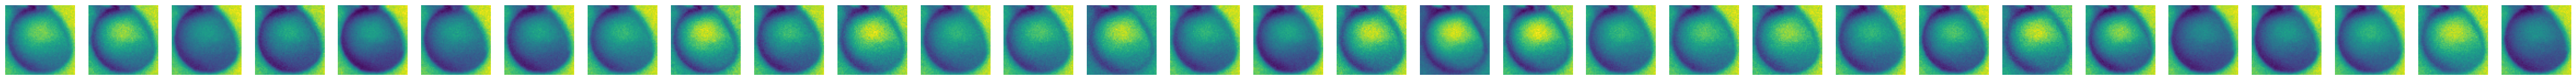

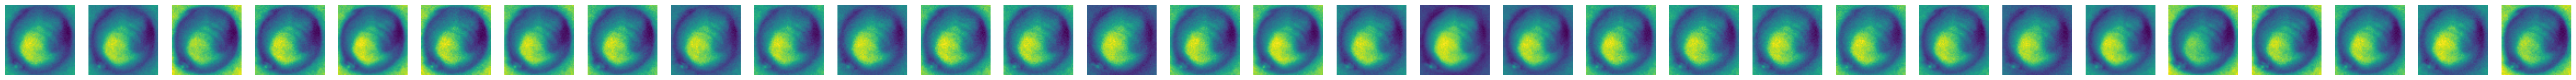

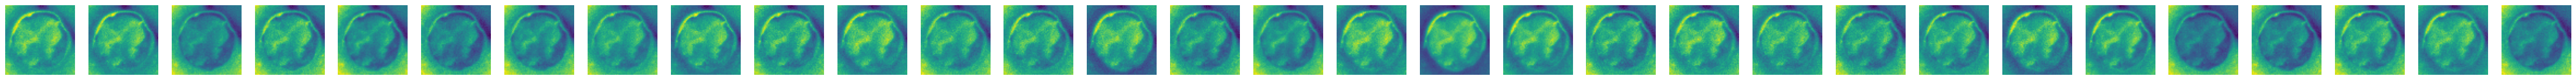

In [39]:
for image,label in dataset.take(5):
    qtd_canais = image.shape[-1]
    plt.figure(figsize=(64,64))
    for i in range(qtd_canais):
        image_to_show = image[..., i]
        plt.subplot(1,31,i+1)
        plt.imshow(image_to_show)
        plt.axis('off')
    plt.show()